# Load libraries and import datasets

In [3]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

# DATA PRE PROCESSING

In [4]:
students_port = pd.read_csv('student-por.csv', sep=';', quotechar='"')

print(students_port.head()) 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [6]:
students_math=pd.read_csv('student-mat.csv',sep=';')
print(students_math.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [7]:
#Check the structure and summary of the datasets before merging them together
print(students_math.info())
print(students_port.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
print(students_math.describe())
print(students_port.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

# Note found on readme for data sets:
> _Additional note:_ there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student

In [10]:
#Merge datasets on attribute "invariant" columns to only keep the same students present in both datasets
student_merged=pd.merge(students_math, students_port, how='inner', on=['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [11]:
student_merged.to_csv('student_merged.csv', index=False)

In [12]:
#Confirm there are no missing values in the merged dataset
missing = student_merged.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [14]:
# Convert appropriate columns
generic_cats = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian_x', 'guardian_y', 'schoolsup_x', 'schoolsup_y', 'famsup_x', 'famsup_y', 'paid_x', 'paid_y', 'activities_x', 'activities_y', 'nursery', 'higher_x', 'higher_y', 'internet', 'romantic_x', 'romantic_y']
for col in generic_cats:
    if col in student_merged.columns:
        student_merged[col] = student_merged[col].astype('category')
print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        382 non-null    category
 1   sex           382 non-null    category
 2   age           382 non-null    int64   
 3   address       382 non-null    category
 4   famsize       382 non-null    category
 5   Pstatus       382 non-null    category
 6   Medu          382 non-null    int64   
 7   Fedu          382 non-null    int64   
 8   Mjob          382 non-null    category
 9   Fjob          382 non-null    category
 10  reason        382 non-null    category
 11  guardian_x    382 non-null    category
 12  traveltime_x  382 non-null    int64   
 13  studytime_x   382 non-null    int64   
 14  failures_x    382 non-null    int64   
 15  schoolsup_x   382 non-null    category
 16  famsup_x      382 non-null    category
 17  paid_x        382 non-null    category
 18  activities

In [18]:
#Find outliers for numeric values
numeric_cols = student_merged.select_dtypes(include=['int64', 'float64']).columns
# Calculate the range (maximum - minimum) for each numeric variable
range_values = student_merged[numeric_cols].max() - student_merged[numeric_cols].min()
print("Range of each numeric variable:\n", range_values)


# Calculate the variance for each numeric variable
variance_values = student_merged[numeric_cols].var()
print("\nVariance of each numeric variable:\n", variance_values)


Range of each numeric variable:
 age              7.000000
Medu             4.000000
Fedu             4.000000
traveltime_x     3.000000
studytime_x      3.000000
failures_x       3.000000
famrel_x         4.000000
freetime_x       4.000000
goout_x          4.000000
Dalc_x           4.000000
Walc_x           4.000000
health_x         4.000000
absences_x      17.857375
G1_x            16.000000
G2_x            19.000000
G3_x            20.000000
traveltime_y     3.000000
studytime_y      3.000000
failures_y       3.000000
famrel_y         4.000000
freetime_y       4.000000
goout_y          4.000000
Dalc_y           4.000000
Walc_y           4.000000
health_y         4.000000
absences_y      14.000000
G1_y            19.000000
G2_y            14.000000
G3_y            19.000000
dtype: float64

Variance of each numeric variable:
 age              1.377032
Medu             1.180223
Fedu             1.201742
traveltime_x     0.483551
studytime_x      0.715374
failures_x       0.532142
famre

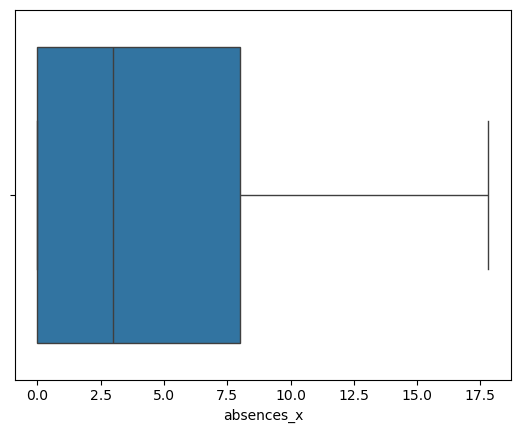

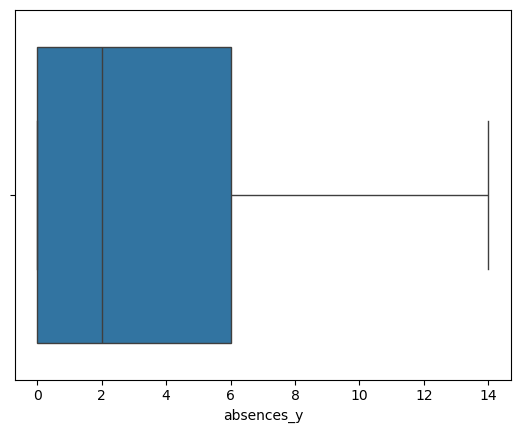

In [20]:
#Check outliers in numeric columns with highest variance, besides grades
plt.figure(); sns.boxplot(x=student_merged['absences_x']); plt.show()
plt.figure(); sns.boxplot(x=student_merged['absences_y']); plt.show()


2. Finalize Outlier & Missing Value Handling
You have capped absencesx and absencesy at their 95th percentiles. Apply this logic to any other numeric features with large outliers.

Handle missing values: make sure no columns used for modeling have NaNs. Impute or drop as appropriate.

3. Categorical Encoding – Applied Consistently
Before encoding: Simplify rare categories (e.g. group rare jobs in Fjob, Mjob as 'other').

Use one-hot encoding for all categorical columns (keep drop_first=True to avoid multicollinearity), and ensure this is applied identically to every version of your data.

Confirm all columns are now numeric (required for both Random Forests and KMeans).

4. Feature Engineering
Create any new features that will help all models: combined absences (mean or sum), total failures, mean of family education, combined support, etc.

Document engineered features so all teammates use the same logic.

5. Create Two Master DataFrames
With prior grades: Keep all features, including G1x, G2x, G1y, G2y.

Without prior grades: Drop G1x, G2x, G1y, G2y columns. (Keep G3x and G3y if they remain your outcome/target for training only.)

Save both as separate DataFrames (and optionally as .csv files), so each teammate can work from the same base.

6. Scaling (for KMeans)
Create a version of each DataFrame (especially the one you'll use with K-Means) where all numeric columns are standardized (mean=0, std=1). This is critical for K-Means, optional for tree models.

Save these as additional versions if you wish (e.g. df_with_grades_scaled, df_without_grades_scaled).

7. Feature List Documentation
Keep a short document or code cell listing what features are in each DataFrame version—so teammates always know which columns are present and which are not.


| Step                             | Why it Matters                                      |
| -------------------------------- | --------------------------------------------------- |
| Fix merge types                  | Consistent rows/columns for all models              |
| Handle outliers/missing          | Cleaner, comparable models                          |
| Standardize categorical encoding | Reliable input for any ML or clustering algorithm   |
| Uniform feature engineering      | Reuse features and logic across all team models     |
| Two master DataFrames (± grades) | Enables all supervised/unsupervised workflows       |
| Scaled versions for clustering   | Required for KMeans and other distance-based models |
| Doc feature lists                | Keeps your team on the same page                    |

In [21]:
# Cap values of 'absences_x' and 'absences_y' at their 95th percentile to reduce the effect of outliers
cap_value_x = student_merged['absences_x'].quantile(0.95)
cap_value_y = student_merged['absences_y'].quantile(0.95)

student_merged['absences_x'] = student_merged['absences_x'].clip(upper=cap_value_x)
student_merged['absences_y'] = student_merged['absences_y'].clip(upper=cap_value_y)

In [22]:
all_columns = student_merged.columns

# Identify categorical columns by excluding numeric columns
categorical_cols = all_columns.difference(numeric_cols)
print(categorical_cols)


Index(['Fjob', 'Mjob', 'Pstatus', 'activities_x', 'activities_y', 'address',
       'famsize', 'famsup_x', 'famsup_y', 'guardian_x', 'guardian_y',
       'higher_x', 'higher_y', 'internet', 'nursery', 'paid_x', 'paid_y',
       'reason', 'romantic_x', 'romantic_y', 'school', 'schoolsup_x',
       'schoolsup_y', 'sex'],
      dtype='object')


In [26]:
#Pool rare cateogories into 'Other' for categorical columns with many unique values before encoding
student_merged['Fjob'] = student_merged['Fjob'].str.lower()

for col in categorical_cols:
    if col in student_merged.columns:
        value_counts = student_merged[col].value_counts(normalize=True)
        rare_categories = value_counts[value_counts < 0.05].index
        student_merged[col] = student_merged[col].replace(rare_categories, 'Other')
        student_merged[col] = student_merged[col].astype('category')
print(student_merged[categorical_cols].nunique())

Fjob            3
Mjob            5
Pstatus         2
activities_x    2
activities_y    2
address         2
famsize         2
famsup_x        2
famsup_y        2
guardian_x      3
guardian_y      3
higher_x        2
higher_y        2
internet        2
nursery         2
paid_x          2
paid_y          2
reason          4
romantic_x      2
romantic_y      2
school          2
schoolsup_x     2
schoolsup_y     2
sex             2
dtype: int64


In [27]:
print(student_merged['Fjob'].value_counts())
print(student_merged['Mjob'].value_counts())
print(student_merged['reason'].value_counts())


Fjob
other       244
services    107
teacher      31
Name: count, dtype: int64
Mjob
other       138
services     96
teacher      62
at_home      53
health       33
Name: count, dtype: int64
reason
course        140
home          110
reputation     98
other          34
Name: count, dtype: int64


In [28]:
# Apply one-hot encoding
student_merged_encoded = pd.get_dummies(
    student_merged,
    columns=categorical_cols,
    drop_first=True
)
student_merged_encoded = student_merged_encoded.astype(int)
print(student_merged_encoded.head(2))

print(student_merged_encoded['Fjob_services'].head())

   age  Medu  Fedu  traveltime_x  studytime_x  failures_x  famrel_x  \
0   18     4     4             2            2           0         4   
1   17     1     1             1            2           0         5   

   freetime_x  goout_x  Dalc_x  ...  paid_y_yes  reason_home  reason_other  \
0           3        4       1  ...           0            0             0   
1           3        3       1  ...           0            0             0   

   reason_reputation  romantic_x_yes  romantic_y_yes  school_MS  \
0                  0               0               0          0   
1                  0               0               0          0   

   schoolsup_x_yes  schoolsup_y_yes  sex_M  
0                1                1      0  
1                0                0      0  

[2 rows x 61 columns]
0    0
1    0
2    0
3    1
4    0
Name: Fjob_services, dtype: int64


In [32]:
#verify that all columns are numeric after encoding
print(student_merged_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                382 non-null    int64
 1   Medu               382 non-null    int64
 2   Fedu               382 non-null    int64
 3   traveltime_x       382 non-null    int64
 4   studytime_x        382 non-null    int64
 5   failures_x         382 non-null    int64
 6   famrel_x           382 non-null    int64
 7   freetime_x         382 non-null    int64
 8   goout_x            382 non-null    int64
 9   Dalc_x             382 non-null    int64
 10  Walc_x             382 non-null    int64
 11  health_x           382 non-null    int64
 12  absences_x         382 non-null    int64
 13  G1_x               382 non-null    int64
 14  G2_x               382 non-null    int64
 15  G3_x               382 non-null    int64
 16  traveltime_y       382 non-null    int64
 17  studytime_y     

In [29]:
student_merged_encoded.to_csv('student_merged_encoded.csv', index=False)

In [33]:
#Check for inconsistencies in responses from the same students in both datasets

#Check for inconsistencies in 'guardian' (Guardian)
is_guardian_same = (student_merged['guardian_x'] == student_merged['guardian_y']).all()
print(f"Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  {is_guardian_same}")

#Check for inconsistencies in 'Dalc' (Alcohol consumption during weekdays)
is_dalc_same = (student_merged['Dalc_x'] == student_merged['Dalc_y']).all()
print(f"Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  {is_dalc_same}")

#Count number of rows where 'guardian' and 'Dalc' differ
guardian_diff = (student_merged['guardian_x'] != student_merged['guardian_y']).sum()
dalc_diff = (student_merged['Dalc_x'] != student_merged['Dalc_y']).sum()
print(f"Number of rows where 'guardian' is different: {guardian_diff}")
print(f"Number of rows where 'Dalc' is different: {dalc_diff}")

Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  False
Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  False
Number of rows where 'guardian' is different: 6
Number of rows where 'Dalc' is different: 5


## Students report different things for each survey, columns cannot be merged. Each columns will be treated separetely

#  FEATURE ENGINEERING

# Identify at _risk students_

In [34]:

# we have 'at_risk_math' and at_risk_port' as our target variables (G3_x and G3_y for final grades in math and portuguese respectively)
#G3 - final grade (numeric: from 0 to 20) if less than 10 - at risk of failing

# Condition: Is student_merged['G3_x'] < 10?
# If True:  set value to 1 (At Risk)
# If False: set value to 0 (Not At Risk)

student_merged['at_risk_math'] = np.where(student_merged['G3_x'] < 10, 1, 0)
student_merged['at_risk_port'] = np.where(student_merged['G3_y'] < 10, 1, 0)

# Combine 'at_risk_total' column for visualization

def set_at_risk_total(row):
    if row['at_risk_math'] == 1 and row['at_risk_port'] == 1:
        return 'At Risk (Both)'
    elif row['at_risk_math'] == 1:
        return 'At Risk (Math Only)'
    elif row['at_risk_port'] == 1:
        return 'At Risk (Port Only)'
    else:
        return 'Not At Risk'

student_merged['at_risk_total'] = student_merged.apply(set_at_risk_total, axis=1)


print("\n--- Target Variable Creation ---")
print("Breakdown of 'at_risk_math':")
print(student_merged['at_risk_math'].value_counts())

print("\nBreakdown of 'at_risk_port':")
print(student_merged['at_risk_port'].value_counts())

print("\nBreakdown of 'at_risk_total':")
print(student_merged['at_risk_total'].value_counts())


--- Target Variable Creation ---
Breakdown of 'at_risk_math':
at_risk_math
0    255
1    127
Name: count, dtype: int64

Breakdown of 'at_risk_port':
at_risk_port
0    350
1     32
Name: count, dtype: int64

Breakdown of 'at_risk_total':
at_risk_total
Not At Risk            246
At Risk (Math Only)    104
At Risk (Both)          23
At Risk (Port Only)      9
Name: count, dtype: int64


# Create cleaned dataset ready for visualization

In [ ]:
# Create cleaned dataset ready for visualization
# These are the columns  used to merge. They are the 'invariant' attributes.
invariant_features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

# These are the 'variant' attributes related to the Math class (_x)
math_features = [
    'guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x',
    'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x',
    'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x'
]

# These are the 'variant' attributes related to the Portuguese class (_y)
port_features = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y',
    'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
    'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y'
]

# These are the grade and target columns
target_features = [
    'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y',
    'at_risk_math', 'at_risk_port', 'at_risk_total'
]

print("\n--- Feature Lists Created ---")
print(f"Invariant Features ({len(invariant_features)})")
print(f"Math-Specific Features ({len(math_features)})")
print(f"Portuguese-Specific Features ({len(port_features)})")

In [ ]:
student_merged.to_csv('student_merged_cleaned.csv', index=False)

# **Data Visualization**

In [ ]:
#Draw a heatmap to visualize the correlation of invariant and variant features with final grades
# Select key features: invariant, variant, and targets
invariant_features_sel =  ['Medu', 'Fedu', 'age'] + \
                         [col for col in student_merged_encoded.columns if col.startswith(('Mjob_', 'Fjob_', 'Pstatus_', 'sex_', 'nursery_', 'internet_'))]

variant_features_x_sel = ['studytime_x', 'failures_x', 'absences_x', 'Dalc_x', 'Walc_x', 'health_x', 'goout_x', 'freetime_x']
variant_features_y_sel = ['studytime_y', 'failures_y', 'absences_y', 'Dalc_y', 'Walc_y', 'health_y', 'goout_y', 'freetime_y']
targets = ['G3_x', 'G3_y']  # G3_mat and G3_por
features_for_corr = invariant_features_sel + variant_features_x_sel + variant_features_y_sel + targets
df_corr = student_merged_encoded[features_for_corr]
# Calculate the correlation matrix
corr_matrix = df_corr.corr()
corr_with_targets = corr_matrix[targets]

plt.figure(figsize=(16,12))
# Draw the heatmap
sns.heatmap(
    corr_with_targets,       # Correlations of features with G3_x and G3_y
    annot=True,              # Show correlation values
    fmt=".2f",
    cmap="coolwarm",         # Color map for positive/negative correlation
    center=0,                # Center at 0 (neutral correlation)
    linewidths=0.5
)
plt.title("Feature Correlation with Final Grades", fontsize=16)
plt.ylabel("Features", fontsize=12)
plt.xlabel("Grades", fontsize=12)

# **Basic stats and plots**

*Average grades by school*

In [ ]:
from scipy import stats
#average student performance by school to analynse any variances
students_all = pd.read_csv("student_merged_cleaned.csv")
print("average final grades for math per school")
print(students_all['school'].unique())

# Group means by school for math
print(students_all.groupby('school')['G3_x'].mean())
# Compare statistically
school1 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_x']
school2 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_x']
t_stat, p_val = stats.ttest_ind(school1, school2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_x')
means = students_all.groupby('school')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Math by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

# Group means by school for Portuguese
print("average final grades for Portuguese per school")
print(students_all.groupby('school')['G3_y'].mean())
# Compare statistically
school3 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_y']
school4 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_y']

t_stat, p_val = stats.ttest_ind(school3, school4, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_y')
means = students_all.groupby('school')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Portuguese by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

interpretation: Overall, GP school has better grades. 
For math the variance is acceptable.
However, for Portuguese the P-value is significant

*Comparision based on gender*

In [ ]:
#is the perfromance affected by the gender of the student?
#1. Math
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_x'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_x')
means = students_all.groupby('sex')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Math by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()
#2. Portuguese
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_y'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_y')
means = students_all.groupby('sex')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Portuguese by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

interpretation: Males perform slightly better in Math while Females perform slightly better in Portugese.

*The relationship between study time and performance*

In [ ]:
#How does the studytime affect the final grade?
#1. Math
print(students_all.groupby('studytime_x')['G3_x'].mean())
sns.stripplot(data=students_all, x='studytime_x', y='G3_x', jitter=True, palette='Set2', size=4)
plt.title('Math Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_x')
plt.show()
#2. Portuguese
print(students_all.groupby('studytime_y')['G3_y'].mean())
sns.stripplot(data=students_all, x='studytime_y', y='G3_y', jitter=True, palette='Set2', size=4)
plt.title('Portuguese Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_y')
plt.show()

Interpretation: Slight increase in final grade with study time

Failures Vs Performance

In [ ]:
#How does the studytime affect the failure? and how does it affect the final grade in return?
#1. Math
print("The number of students who failed Math")
print(students_all.groupby('failures_x')['G3_x'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_x')['G3_x'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_x', y='G3_x', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_x',
    y='G3_x',
    size='studytime_x',       # variable size per student
    sizes=(50, 250),        # min/max point size
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#2. Portuguese
print("The number of students who failed Portuguese")
print(students_all.groupby('failures_y')['G3_y'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_y')['G3_y'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_y', y='G3_y', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_y',
    y='G3_y',
    size='studytime_y',# variable size per student
    sizes=(50, 250),
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

interpretation: The number of failures has a negative impact on the final grade. However, when the study time increase for these  failures the final grade increases.

*Parents education and job impact on students perfomrance*

In [ ]:
#Does parental education impact the students final grades?
print(students_all.groupby('Medu')['G3_x'].count())
print(students_all.groupby('Fedu')['G3_x'].count())
#this shows us that the number of parents with 0 education is very low which gives false results so we will discard them

#1. Math
parent_df = students_all[['Medu', 'Fedu', 'G3_x']].copy()
parent_df = parent_df[(parent_df['Medu'] > 0) & (parent_df['Fedu'] > 0)]
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Education', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_x")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

#2. Portuguese
parent_df2 = students_all[['Medu', 'Fedu', 'G3_y']].copy()
parent_df2 = parent_df2[(parent_df2['Medu'] > 0) & (parent_df2['Fedu'] > 0)]
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Education', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portuguese Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_y")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

Interpretation: Both parents education levels shows a positive impact on the student performance.

In [ ]:
#Does parents Job impact the students final grades?
#1. Math
parent_df = students_all[['Mjob', 'Fjob', 'G3_x']].copy()
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Job', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_x")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()
#2. Portuguese
parent_df2 = students_all[['Mjob', 'Fjob', 'G3_y']].copy()
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Job', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portugese Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_y")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')
plt.legend(title='Parent')
plt.show()

Interpretation: Parents who are at home have a negative impact on students math grades but does not seem to impact Portugese as much. Overall, parental jobs show less impact on student final grades than parental education.